In [1]:
#required libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Q1  Delivery_time -> Predict delivery time using sorting time 

In [2]:
delivery_time_df=pd.read_csv('delivery_time.csv')

In [3]:
delivery_time_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


##### Data visualization and Data Analysis

In [4]:
delivery_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
delivery_time_df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
delivery_time_df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

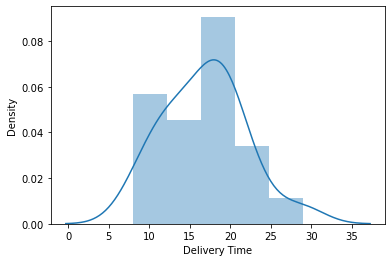

In [7]:
sns.distplot(delivery_time_df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

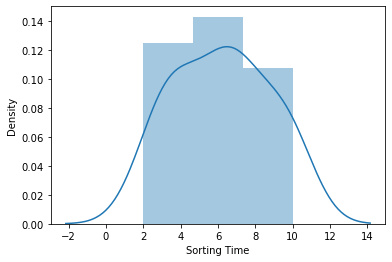

In [8]:
sns.distplot(delivery_time_df['Sorting Time'])

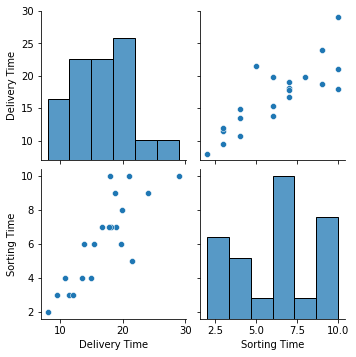

In [9]:
sns.pairplot(delivery_time_df)

## Correlation analysis 

In [10]:
delivery_time_df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


82.% correlation - very high

#### Feature Engineering

In [11]:
X = delivery_time_df[['Sorting Time']].values
Y = delivery_time_df[['Delivery Time']].values

#### Split the dataset 

In [12]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)


#### Build the model


In [13]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [14]:
regressor.coef_

array([[1.96497687]])

In [15]:
regressor.intercept_

array([4.48979648])

#### Prediction of Test and Training Model

In [16]:
y_pred= regressor.predict(X_test)  
x_pred= regressor.predict(Y_train)  

In [17]:
y_pred

array([[24.13956522],
       [10.3847271 ],
       [14.31468085],
       [12.34970398],
       [12.34970398],
       [20.20961147],
       [10.3847271 ]])

In [18]:
Y_test

array([[17.9 ],
       [11.5 ],
       [21.5 ],
       [13.5 ],
       [10.75],
       [19.83],
       [12.03]])

#### Model Evaluation

In [19]:
r2_score(Y_test, y_pred)

0.14161803297912778

In [20]:
y_pred = regressor.predict(X_test)
print('R-squared:', r2_score(Y_test, y_pred))
print('MSE:', mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))

R-squared: 0.14161803297912778
MSE: 14.076868647165186
RMSE: 3.751915330489907


## Another method 

In [21]:
#Building Linear regression model
model=smf.ols("X~Y",data=delivery_time_df).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 03 May 2023   Prob (F-statistic):           3.98e-06
Time:                        15:00:02   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
Y              0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model1=smf.ols("np.log(X)~np.log(Y)",data=delivery_time_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(X)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.60e-07
Time:                        15:00:02   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
np.log(Y)      1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model2=smf.ols("(X)~np.log(Y)",data=delivery_time_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.59e-06
Time:                        15:00:02   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Y)      6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model3=smf.ols("np.log(X)~Y",data=delivery_time_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(X)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 03 May 2023   Prob (F-statistic):           2.64e-06
Time:                        15:00:02   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
Y              0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model1=smf.ols("np.exp(X)~np.exp(Y)",data=delivery_time_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.exp(X)   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     7.156
Date:                Wed, 03 May 2023   Prob (F-statistic):             0.0150
Time:                        15:00:02   Log-Likelihood:                -214.02
No. Observations:                  21   AIC:                             432.0
Df Residuals:                      19   BIC:                             434.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3451.6882   1518.058      2.274      0.035     274.357    6629.019
np.exp(Y)   4.734e-09   1.77e-09      2.675      0.015    1.03e-09    8.44e-09
==============================================================================
Omnibus:                       22.882   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.557
Skew:                           2.222   Prob(JB):                     6.29e-07
Kurtosis:                       6.590   Cond. No.                     8.79e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By Values , we can say that model 2 is best , as it has the following


In [27]:
model2.rsquared

0.7109478980584186

In [28]:
model2.rsquared_adj

0.6957346295351775

In [29]:
model2.pvalues

Intercept    0.000222
np.log(Y)    0.000002
dtype: float64

In [30]:
model2.tvalues

Intercept   -4.543446
np.log(Y)    6.836088
dtype: float64

In [31]:
model2.params

Intercept   -12.499233
np.log(Y)     6.735548
dtype: float64

Hence, The linear regression eq will be

log Y = Log X * (6.7355) -12.4992

The scatter plot will be

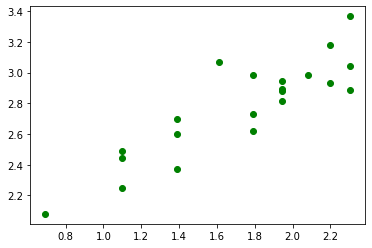

In [32]:
plt.scatter(np.log(X),np.log(Y),color='green')
plt.show()

# Q2 ---> Salary_hike -> Build a prediction model for Salary_hike 

In [33]:
salary_df=pd.read_csv('Salary_Data.csv')

#### EDA and Data Analysis

In [34]:
salary_df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [35]:
salary_df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [36]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [37]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### Visualization 

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

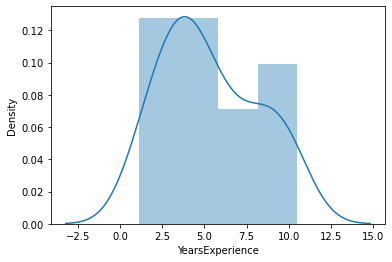

In [38]:
sns.distplot(salary_df.YearsExperience)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

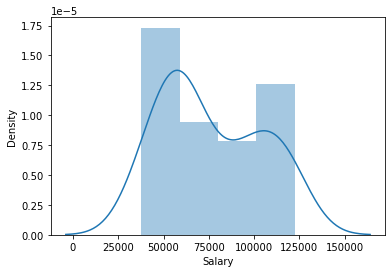

In [39]:
sns.distplot(salary_df.Salary)

#### Correlation Analysis 

In [40]:
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


97.8% correlation - Very High

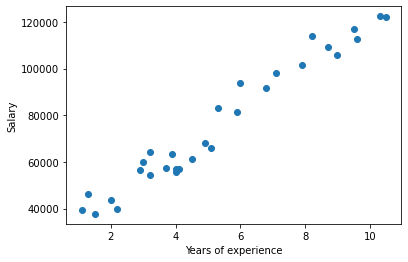

In [41]:
plt.scatter(salary_df.YearsExperience,salary_df.Salary)
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

#### Regression Model 

In [42]:
x= salary_df.iloc[:, :-1].values  
y= salary_df.iloc[:, 1].values   

In [43]:
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)  

In [44]:
#Fitting the Simple Linear Regression model to the training dataset   
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

In [45]:
regressor.coef_

array([9345.94244312])

In [46]:
regressor.intercept_

26816.192244031183

In [47]:
#Prediction of Test and Training set result  
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)  

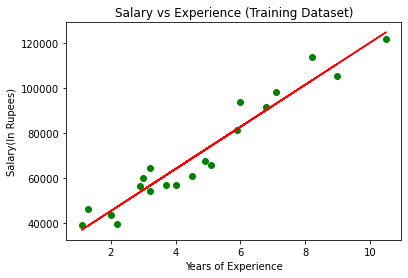

In [48]:
#Visualization of Training Test Results
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()   

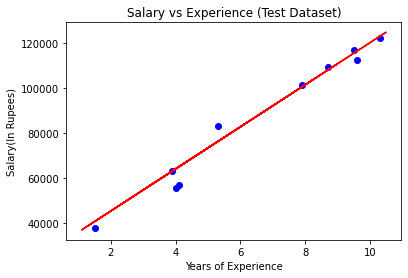

In [49]:
#visualizing the Test set results  
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  

###### As we can see, most of the observations are close to the regression line, hence we can say our Simple Linear Regression is a good model and able to make good predictions.

#### Another Method 

### Regression Model 

In [50]:
#building linear regression model
model1=smf.ols('Salary~YearsExperience',data=salary_df).fit()

In [51]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.14e-20
Time:                        15:00:06   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model2=smf.ols('np.log(Salary)~np.log(YearsExperience)',data=salary_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 03 May 2023   Prob (F-statistic):           7.40e-16
Time:                        15:00:06   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model3=smf.ols('Salary~np.log(YearsExperience)',data=salary_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 03 May 2023   Prob (F-statistic):           3.25e-13
Time:                        15:00:06   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model4=smf.ols('np.log(Salary)~YearsExperience',data=salary_df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 03 May 2023   Prob (F-statistic):           7.03e-18
Time:                        15:00:06   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By these, we can say that model1 is the best

In [55]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [56]:
model1.rsquared

0.9569566641435086

In [57]:
model1.rsquared_adj

0.9554194021486339

In [58]:
model1.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [59]:
model1.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

#### Hence the linear equation will be
Salary=9449.962321*YearsExperience + 25792.200199
